In [1]:
#Wat heb ik gedaan.
#Eerst bepaald welke niet fossiele energie interessant zijn. 
#Vervolgens  gezocht naar een data set met prijzen van niet fossiele energie. 
#De data vervolgens verschoond via drop(na). Daarna kolommen verwijderd die niet interessant zijn en de namen van de kolommen veranderd. 
#De volgende stap was om lineaire regressie toe te passen. 
#De daaruit verkregen informatie heb ik vervolgens gebruikt om een nieuwe dataframe te maken met die gegevens. 
#Tenslotte heb ik uit de nieuwe dataframe een plot gemaakt. 
#Conclusie: Daaruit blijkt dat de beste prijs voor niet fossiele energie komt ten gunste van solar energie.
 #Als laatste heb ik voor de jaren 2000 tot en met 2050 nog een voorspelling van de prijzen gemaakt en dit ook grafisch weergegeven. Daaruit blijkt temeer de daling van de solar, Zonne energie is daarmee de niet fossiele energie  met de laagste prijs voor de toekomst.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/levelized-cost-of-energy.csv')

In [3]:
df_1= df.dropna()
df_1

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
447,World,OWID_WRL,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
449,World,OWID_WRL,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,OWID_WRL,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,OWID_WRL,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,OWID_WRL,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,OWID_WRL,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,OWID_WRL,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,OWID_WRL,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,OWID_WRL,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,World,OWID_WRL,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137


In [4]:
df_2 = df_1.drop(['Entity', 'Code'], axis=1)

In [5]:
df_2.rename({'Bioenergy levelized cost of energy': 'Bio', 'Geothermal levelized cost of energy': 'Geo','Offshore wind levelized cost of energy':'Offshore', 'Solar photovoltaic levelized cost of energy': 'Solar', 'Concentrated solar power levelized cost of energy':'Con','Hydropower levelized cost of energy': 'Hydro', 'Onshore wind levelized cost of energy':'Onshore'}, axis=1, inplace=True)
df_2

,Year,Bio,Geo,Offshore,Solar,Con,Hydro,Onshore
447,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
449,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
import matplotlib.pyplot as plt

In [8]:
years = np.array(range(2000,2050)).reshape(-1,1)


In [9]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Bio = df_2['Bio'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Bio)  # perform linear regression
Bio_pred = linear_regressor.predict(X)  # make predictions
print (Bio_pred)

[[0.07713971]
 [0.07499305]
 [0.07391971]
 [0.07284638]
 [0.07177304]
 [0.07069971]
 [0.06962637]
 [0.06855304]
 [0.06747971]
 [0.06640637]
 [0.06533304]]


In [10]:
Bio_pred= linear_regressor.predict(years)

In [11]:
print (Bio_pred)

[[0.08787306]
 [0.08679972]
 [0.08572639]
 [0.08465305]
 [0.08357972]
 [0.08250639]
 [0.08143305]
 [0.08035972]
 [0.07928638]
 [0.07821305]
 [0.07713971]
 [0.07606638]
 [0.07499305]
 [0.07391971]
 [0.07284638]
 [0.07177304]
 [0.07069971]
 [0.06962637]
 [0.06855304]
 [0.06747971]
 [0.06640637]
 [0.06533304]
 [0.0642597 ]
 [0.06318637]
 [0.06211303]
 [0.0610397 ]
 [0.05996636]
 [0.05889303]
 [0.0578197 ]
 [0.05674636]
 [0.05567303]
 [0.05459969]
 [0.05352636]
 [0.05245302]
 [0.05137969]
 [0.05030636]
 [0.04923302]
 [0.04815969]
 [0.04708635]
 [0.04601302]
 [0.04493968]
 [0.04386635]
 [0.04279302]
 [0.04171968]
 [0.04064635]
 [0.03957301]
 [0.03849968]
 [0.03742634]
 [0.03635301]
 [0.03527968]]


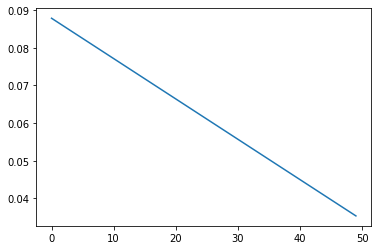

In [12]:
plt.plot (Bio_pred)

In [13]:
df_Bio={'Bio': [0.07713971, 0.07499305, 0.07391971, 0.07284638, 0.07177304, 0.07069971, 0.06962637, 0.06855304, 0.06747971,0.06640637, 0.06533304]}
df_Bio = pd.DataFrame(df_Bio)

In [ ]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Geo = df_2['Geo'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Geo)  # perform linear regression
Geo_pred = linear_regressor.predict(X)  # make predictions
print (Geo_pred)

In [ ]:
Geo_pred= linear_regressor.predict(years)
print ( Geo_pred)

In [ ]:
plt.plot (Geo_pred)

In [17]:
df_Geo={ 'Geo': [0.06538492, 0.06540611, 0.0654167, 0.0654273,0.06543789,0.06544848,0.06545908,0.06546967,0.06548026,0.06549086,0.06550145]}
df_Geo=pd.DataFrame(df_Geo)

In [ ]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Offshore = df_2['Offshore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Offshore)  # perform linear regression
Offshore_pred = linear_regressor.predict(X)  # make predictions
print (Offshore_pred)

In [ ]:
Offshore_pred= linear_regressor.predict(years)
print (Offshore_pred)

In [20]:
df_Offshore ={ 'Offshore': [0.19433922, 0.17176871, 0.16048346, 0.14919821, 0.13791295, 0.1266277, 0.11534245, 0.1040572 , 0.09277194, 0.08148669, 0.07020144]}
df_Offshore= pd.DataFrame(df_Offshore)

In [21]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Solar = df_2['Solar'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Solar)  # perform linear regression
Solar_pred = linear_regressor.predict(X)  # make predictions
print (Solar_pred)

[[ 0.30601368]
 [ 0.2497804 ]
 [ 0.22166376]
 [ 0.19354712]
 [ 0.16543048]
 [ 0.13731384]
 [ 0.1091972 ]
 [ 0.08108056]
 [ 0.05296392]
 [ 0.02484728]
 [-0.00326936]]


In [22]:
Solar_pred= linear_regressor.predict(years)

In [23]:
df_Solar ={ 'Solar': [0.30601368,  0.2497804 ,  0.22166376,  0.19354712,  0.16543048,  0.13731384,  0.1091972 , 0.08108056,  0.05296392, 0.02484728, -0.00326936]}
df_Solar= pd.DataFrame(df_Solar)

In [24]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Con = df_2['Con'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Con) 
Con_pred = linear_regressor.predict(X)  # make predictions
print (Con_pred)

[[0.34432944]
 [0.30225004]
 [0.28121034]
 [0.26017064]
 [0.23913094]
 [0.21809124]
 [0.19705154]
 [0.17601184]
 [0.15497214]
 [0.13393243]
 [0.11289273]]


In [25]:
Con_pred= linear_regressor.predict(years)

In [26]:
df_Con={ 'Con': [0.34432944, 0.30225004, 0.28121034, 0.26017064, 0.23913094, 0.21809124, 0.19705154,0.17601184, 0.15497214, 0.13393243, 0.11289273]}
df_Con= pd.DataFrame(df_Con)

In [27]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Hydro = df_2['Hydro'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Hydro)  # perform linear regression
Hydro_pred = linear_regressor.predict(X)  # make predictions
print (Hydro_pred)

[[0.03868133]
 [0.0401456 ]
 [0.04087773]
 [0.04160987]
 [0.042342  ]
 [0.04307414]
 [0.04380627]
 [0.04453841]
 [0.04527054]
 [0.04600268]
 [0.04673481]]


In [28]:
Hydro_pred= linear_regressor.predict(years)

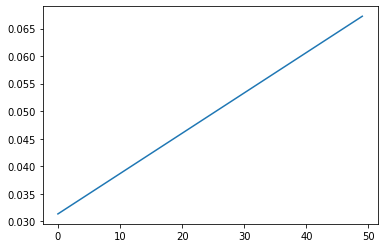

In [29]:
plt.plot ( Hydro_pred)

In [30]:
df_Hydro={ 'Hydro':[0.03868133, 0.0401456 , 0.04087773, 0.04160987, 0.042342, 0.04307414, 0.04380627, 0.04453841, 0.04527054, 0.04600268, 0.04673481]}

df_Hydro= pd.DataFrame(df_Hydro)

In [31]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Onshore = df_2['Onshore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Onshore)  # perform linear regression
Onshore_pred = linear_regressor.predict(X)  # make predictions
print (Onshore_pred)

[[0.1038152 ]
 [0.09078142]
 [0.08426453]
 [0.07774764]
 [0.07123075]
 [0.06471386]
 [0.05819698]
 [0.05168009]
 [0.0451632 ]
 [0.03864631]
 [0.03212942]]


In [32]:
Onshore_pred= linear_regressor.predict(years)

In [33]:
X = df_2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array (edited) 

In [34]:
df_Year = {'Year':[2010,2012,2013,2014,2015,2016,2017,2018,2019,2020, 2021]} 

In [35]:
df_Year = pd.DataFrame(df_Year)

In [36]:
bio = df_2['Bio']
bio

447    0.078189
449    0.061879
450    0.082198
451    0.082375
452    0.072771
453    0.071178
454    0.071070
455    0.055360
456    0.063933
457    0.072473
458    0.067343
Name: Bio, dtype: float64

In [37]:
df_Onshore= { 'Onshore':[0.1038152 , 0.09078142,0.08426453,0.07774764, 0.07123075, 0.06471386, 0.05819698, 0.05168009, 0.0451632 , 0.03864631, 0.03212942]}
df_Onshore = pd.DataFrame(df_Onshore)

In [38]:
import numpy as np

In [39]:
frame = ([df_Year,df_Bio, df_Geo, df_Offshore,df_Solar,df_Con,df_Hydro, df_Onshore])
df_final= pd.concat(frame,axis=1) 
          
#names=['Bio'],['Geo'],'Offshore','Solar','Con', 'Hydro',['Onshore'])


In [40]:
df_final
df_final.set_index('Year')

,Bio,Geo,Offshore,Solar,Con,Hydro,Onshore
Year,,,,,,,
2010,0.077140,0.065385,0.194339,0.306014,0.344329,0.038681,0.103815
2012,0.074993,0.065406,0.171769,0.249780,0.302250,0.040146,0.090781
2013,0.073920,0.065417,0.160483,0.221664,0.281210,0.040878,0.084265
2014,0.072846,0.065427,0.149198,0.193547,0.260171,0.041610,0.077748
2015,0.071773,0.065438,0.137913,0.165430,0.239131,0.042342,0.071231
2016,0.070700,0.065448,0.126628,0.137314,0.218091,0.043074,0.064714
2017,0.069626,0.065459,0.115342,0.109197,0.197052,0.043806,0.058197
2018,0.068553,0.065470,0.104057,0.081081,0.176012,0.044538,0.051680
2019,0.067480,0.065480,0.092772,0.052964,0.154972,0.045271,0.045163


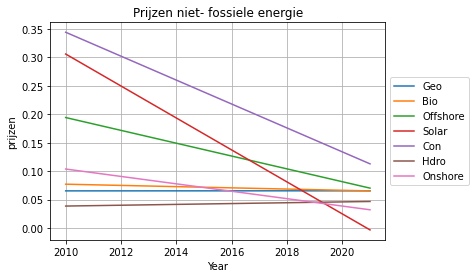

In [41]:
fig, ax = plt.subplots()
plt.plot(df_final['Year'], df_final['Geo'], label="Geo")
plt.plot(df_final['Year'], df_final['Bio'],label="Bio")
plt.plot(df_final['Year'], df_final['Offshore'],label="Offshore")
plt.plot(df_final['Year'], df_final['Solar'],label="Solar")
plt.plot(df_final['Year'], df_final['Con'],label="Con")
plt.plot(df_final['Year'], df_final['Hydro'],label="Hdro")
plt.plot(df_final['Year'], df_final['Onshore'],label="Onshore")
plt.title("Prijzen niet- fossiele energie")
plt.xlabel("Year")
plt.ylabel("prijzen")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()


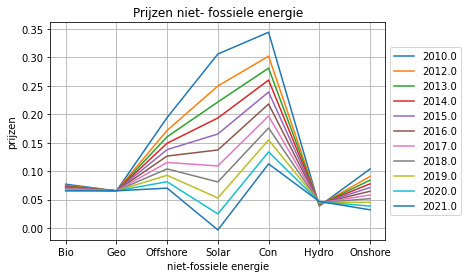

In [42]:
df_final.columns ='Year', 'Bio','Geo','Offshore','Solar','Con', 'Hydro','Onshore'
fig, ax = plt.subplots()

columns  = df_final.columns[1:]

for index, column in df_final.iterrows():
  plt.plot(column[1:], label=column[0])

plt.title("Prijzen niet- fossiele energie")
plt.xlabel("niet-fossiele energie")
plt.ylabel("prijzen")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

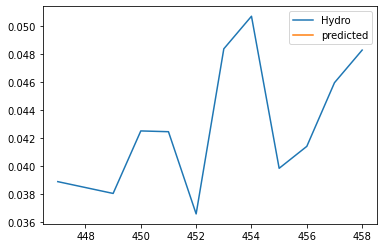

In [43]:
# Fit coefficents.

coef = np.polyfit(df_2['Year'], df_2['Hydro'],1)

# Generate predictions for entire series.

df_2['predicted'] = pd.Series(np.polyval(coef, df_2['Year']))

df_2[['Hydro', 'predicted']].plot()

In [ ]:
years = np.array(range(2000,2050)).reshape(-1,1)
#Solar_pred= linear_regressor.predict(years)
#Bio_pred= linear_regressor.predict(years)
#Hydro_pred= linear_regressor.predict(years)
#Offshore_pred= linear_regressor.predict(years)
#Onshore_pred= linear_regressor.predict(years)
#Con_pred= linear_regressor.predict(years)
Geo_pred= linear_regressor.predict(years)
print (Geo_pred)


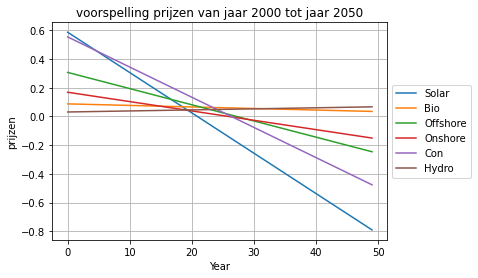

In [48]:
fig, ax = plt.subplots()
plt.plot (Solar_pred,label="Solar")
plt.plot (Bio_pred,label="Bio")
plt.plot (Offshore_pred,label="Offshore")
plt.plot (Onshore_pred,label="Onshore")
plt.plot (Con_pred,label="Con")
plt.plot (Hydro_pred,label="Hydro")
plt.title("voorspelling prijzen van jaar 2000 tot jaar 2050")
plt.xlabel("Year")
plt.ylabel("prijzen")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()